<a href="https://colab.research.google.com/github/ysibghaSE/Assignment_II/blob/main/Assignment_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# ***SIBGHA YOUNIS* (FA24-RAI-016)**

Paper: "Data-Driven Machine-Learning Methods for Diabetes Risk Prediction"

Author: Elias Dritsas and Maria Trigka

Year: 2022

---

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

data = pd.read_csv('/content/diabetes_data.csv')

In [ ]:
data.shape

(520, 17)

In [ ]:
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [ ]:
data.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.dtypes

,0
age,int64
gender,object
polyuria,int64
polydipsia,int64
sudden_weight_loss,int64
weakness,int64
polyphagia,int64
genital_thrush,int64
visual_blurring,int64
itching,int64




---



# ***Exploratory Data Analysis***

In [ ]:
# Set a consistent style for plots
sns.set(style='whitegrid')

**1.   UNI-Variate Analysis**

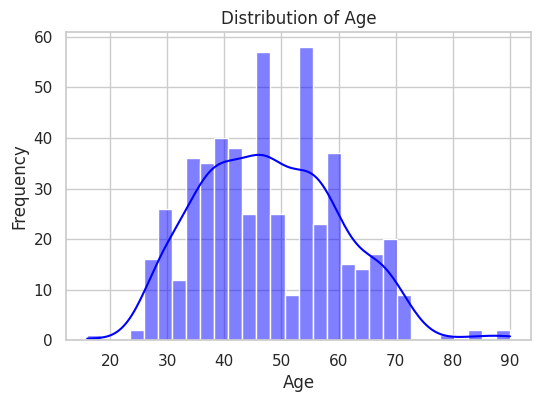

In [ ]:
# Age distribution

plt.figure(figsize=(6, 4))
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

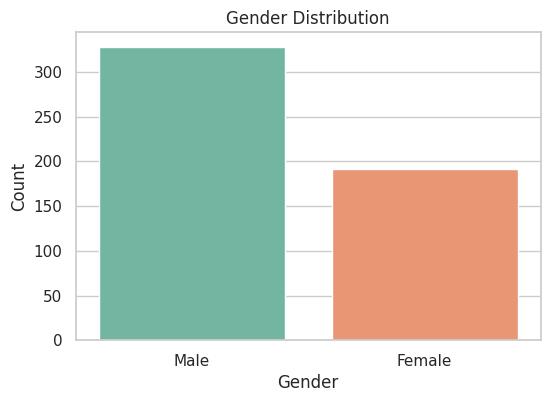

In [ ]:
# Gender distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**2.   BI-Variate Analysis**

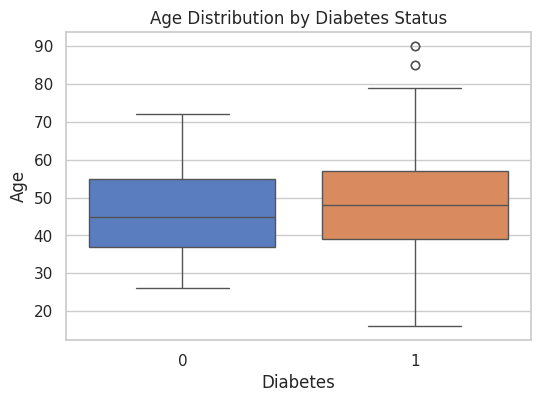

In [ ]:
# Diabetes vs Age

plt.figure(figsize=(6, 4))
sns.boxplot(x='class', y='age', data=data, palette='muted')
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.show()

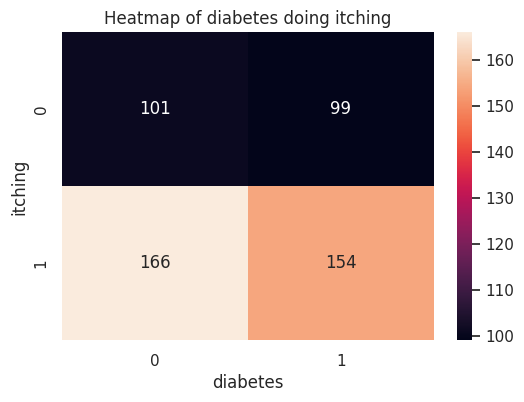

In [ ]:
ct=pd.crosstab(data['class'], data['itching'])
plt.figure(figsize=(6, 4))
sns.heatmap(ct,annot=True,fmt='d')
plt.title('Heatmap of diabetes doing itching')
plt.xlabel('diabetes')
plt.ylabel('itching')
plt.show()

**3.   MULTI-Variate Analysis**

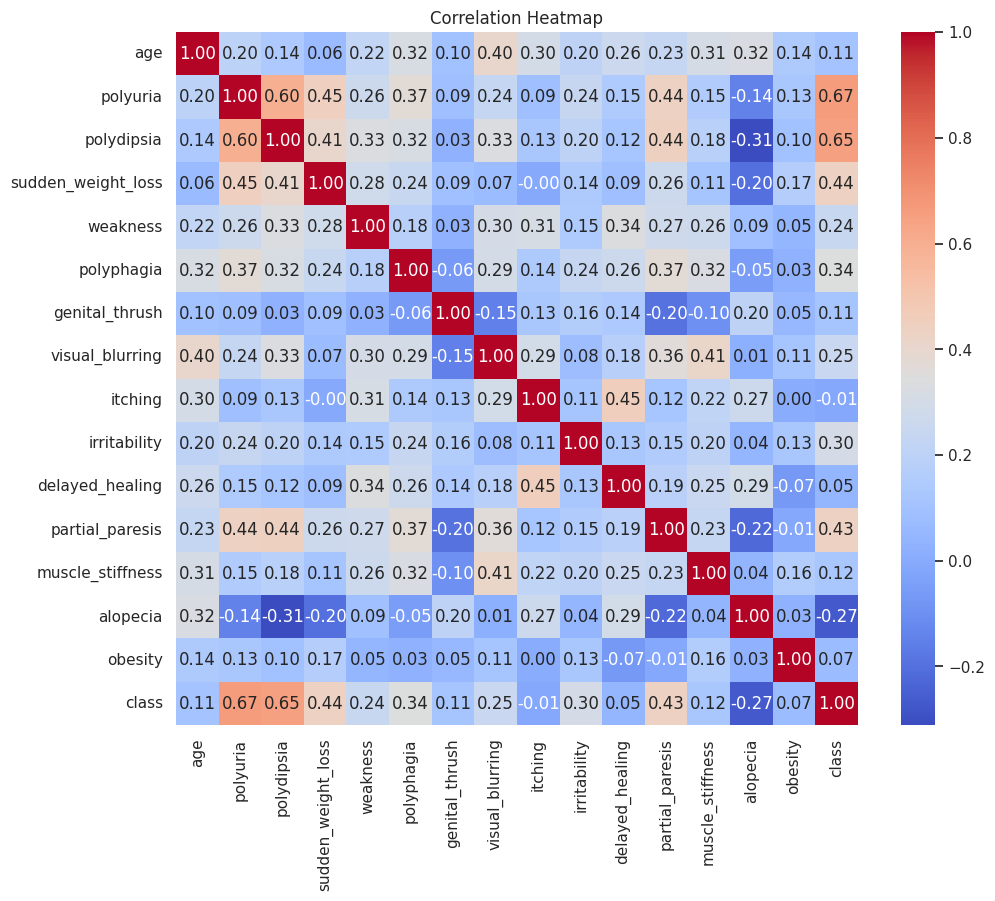

In [ ]:
# Correlation heatmap (for numerical features)

numerical_features = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(11, 9))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

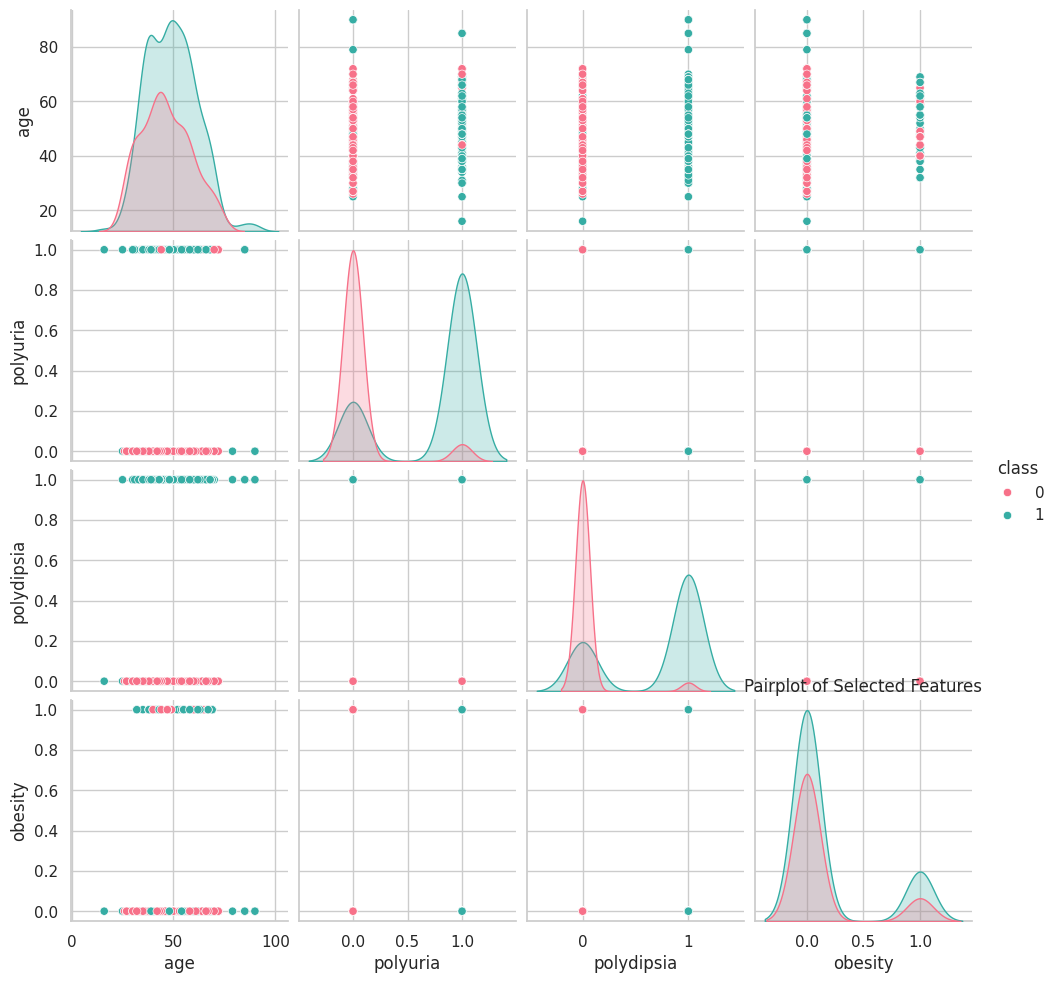

In [ ]:
# Pairplot for selected features

selected_features = ['age', 'polyuria', 'polydipsia', 'obesity', 'class']
sns.pairplot(data[selected_features], hue='class', palette='husl')
plt.title('Pairplot of Selected Features')
plt.show()



---



# Data Preparation

In [ ]:
data.nunique()

,0
age,51
gender,2
polyuria,2
polydipsia,2
sudden_weight_loss,2
weakness,2
polyphagia,2
genital_thrush,2
visual_blurring,2
itching,2


In [ ]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data.isnull().sum()

,0
age,0
gender,0
polyuria,0
polydipsia,0
sudden_weight_loss,0
weakness,0
polyphagia,0
genital_thrush,0
visual_blurring,0
itching,0


In [ ]:
data = data.rename(columns={'class':'diabetes'})

In [ ]:
data.isnull()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
mean_values = data.groupby('diabetes')['age'].mean()
print(mean_values)

diabetes
0    46.360000
1    49.071875
Name: age, dtype: float64


In [ ]:
data.loc[data.duplicated()]

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes
84,35,Female,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
159,38,Female,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
160,28,Female,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
161,68,Female,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
162,35,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
497,47,Male,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
498,68,Female,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
499,64,Male,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0


In [ ]:
data.loc[data.duplicated(subset=['age'])]

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes
14,60,Male,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
15,58,Male,1,1,0,1,1,0,0,0,0,1,1,1,0,0,1
17,67,Male,0,1,0,1,1,0,1,0,1,1,1,1,1,1,1
18,66,Male,1,1,0,1,1,0,1,0,0,0,1,1,0,0,1
21,54,Male,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
# Checking an example duplicate
data.query('age < 45')

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
10,44,Male,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1
11,38,Male,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1
12,35,Male,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,35,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
512,43,Male,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


<Axes: >

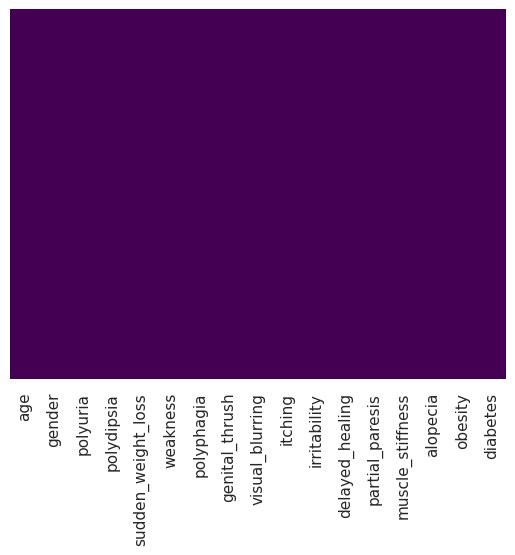

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  diabetes            520 no

In [ ]:
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


***Function Transformer***

In [ ]:
def scale_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    minmax_scaler = MinMaxScaler()
    return minmax_scaler.fit_transform(X_scaled)

numerical_transformer = FunctionTransformer(scale_data, validate=False)

preprocessor = ColumnTransformer(transformers=[
#    ('age_imputer', SimpleImputer(strategy='mean'), ['age']),
    ('ohe', OneHotEncoder(), ['gender']),
    ('num', numerical_transformer, ['age'])
], remainder='passthrough')

transformed_data = preprocessor.fit_transform(data)

transformed_data.shape

(520, 18)

In [ ]:
transformed_data_frame = pd.DataFrame(transformed_data)

transformed_data_frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.324324,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.567568,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.337838,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.391892,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.594595,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0




---



# ***Machine Learning Implementation***

In [ ]:
X = data.drop(columns=['diabetes'])
y = data['diabetes']

X_preprocessed = preprocessor.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(k_neighbors=5, random_state=42)
X_smote, y_smote = smote.fit_resample(X_preprocessed, y)

# Split original and SMOTE-balanced data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Print shapes of datasets
print("Original Data Split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

print("SMOTE Data Split:")
print(f"X_train_smote: {X_train_smote.shape}, X_test_smote: {X_test_smote.shape}, y_train_smote: {y_train_smote.shape}, y_test_smote: {y_test_smote.shape}")

Original Data Split:
X_train: (416, 17), X_test: (104, 17), y_train: (416,), y_test: (104,)
SMOTE Data Split:
X_train_smote: (512, 17), X_test_smote: (128, 17), y_train_smote: (512,), y_test_smote: (128,)


In [ ]:
# Models from the paper

models = [
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(probability=True, random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('ANN', MLPClassifier(max_iter=1000, random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('J48', DecisionTreeClassifier(random_state=42)),
    ('LMT', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Regression Tree', DecisionTreeRegressor(random_state=42)),
    ('RepTree', DecisionTreeClassifier(random_state=42)),
    ('Rotation Forest', RandomForestClassifier(random_state=42)),
    ('AdaBoostM1', AdaBoostClassifier(random_state=42)),
    ('SGD', SGDClassifier(random_state=42)),
    ('Stacking', StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('mlp', MLPClassifier(max_iter=1000, random_state=42))
    ], final_estimator=LogisticRegression()))
]

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }
    return metrics
results = {"Original Data": {}, "SMOTE Data": {}}

# Evaluate each model on the original (imbalanced) data
for model_name, model in models:
    results["Original Data"][model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Evaluate each model on the SMOTE-balanced data
for model_name, model in models:
    results["SMOTE Data"][model_name] = evaluate_model(model, X_train_smote, X_test_smote, y_train_smote, y_test_smote)

**Original Data Results**

In [ ]:
original_results_data = pd.DataFrame(results["Original Data"]).T
original_results_data = pd.DataFrame(results["Original Data"]).T
smote_results_data = pd.DataFrame(results["SMOTE Data"]).T

print(f"Original Data Results:\n", (original_results_data * 100).round(2))

Original Data Results:
                      Accuracy  Precision  Recall  F1 Score     AUC
Naive Bayes             93.27      92.11   98.59     95.24   96.84
SVM                     96.15      98.55   95.77     97.14   98.76
Logistic Regression     92.31      93.15   95.77     94.44   97.23
ANN                     97.12      98.57   97.18     97.87   99.87
KNN                     91.35      95.59   91.55     93.53   97.48
J48                     96.15     100.00   94.37     97.10   97.18
LMT                     92.31      93.15   95.77     94.44   97.23
Random Forest           99.04     100.00   98.59     99.29  100.00
Regression Tree         96.15     100.00   94.37     97.10     NaN
RepTree                 96.15     100.00   94.37     97.10   97.18
Rotation Forest         99.04     100.00   98.59     99.29  100.00
AdaBoostM1              94.23      94.52   97.18     95.83   97.82
SGD                     94.23      94.52   97.18     95.83     NaN
Stacking                97.12      98.

**SMOTE Data Results**

In [ ]:
print(f"SMOTE Data Results:\n",(smote_results_data * 100).round(2))

SMOTE Data Results:
                      Accuracy  Precision  Recall  F1 Score     AUC
Naive Bayes             90.62      89.71   92.42     91.04   97.63
SVM                     96.88      98.44   95.45     96.92   99.76
Logistic Regression     96.09      98.41   93.94     96.12   99.39
ANN                     98.44      98.48   98.48     98.48   99.95
KNN                     92.19      98.28   86.36     91.94   98.26
J48                     98.44      98.48   98.48     98.48   98.44
LMT                     96.09      98.41   93.94     96.12   99.39
Random Forest          100.00     100.00  100.00    100.00  100.00
Regression Tree         98.44      98.48   98.48     98.48     NaN
RepTree                 98.44      98.48   98.48     98.48   98.44
Rotation Forest        100.00     100.00  100.00    100.00  100.00
AdaBoostM1              96.09     100.00   92.42     96.06   99.85
SGD                     94.53      92.75   96.97     94.81     NaN
Stacking                99.22      98.51 

**10-Fold Cross-Validation Results After SMOTE**

In [34]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Function to evaluate models with 10-fold cross-validation
def cross_val_evaluate_model(model, X, y):
    # Pipeline with SMOTE and the model
    pipeline = ImbPipeline(steps=[
        ('smote', SMOTE(k_neighbors=5, random_state=42)),
        ('classifier', model)
    ])

    # Evaluate metrics with cross-validation
    accuracy = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(pipeline, X, y, cv=cv, scoring='precision')
    recall = cross_val_score(pipeline, X, y, cv=cv, scoring='recall')
    f1 = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
    auc = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')

    # Return mean scores across all folds
    return {
        "Accuracy": accuracy.mean(),
        "Precision": precision.mean(),
        "Recall": recall.mean(),
        "F1 Score": f1.mean(),
        "AUC": auc.mean()
    }

# Store cross-validation results
cross_val_results = {}

for model_name, model in models:
    cross_val_results[model_name] = cross_val_evaluate_model(model, X_smote, y_smote)

# Convert results to DataFrame
cross_val_results_data = pd.DataFrame(cross_val_results).T
#cross_val_results_data = cross_val_results_data.reset_index().rename(columns={"index": "Model"})

print(f"10-Fold Cross-Validation Results After SMOTE:\n",(cross_val_results_data * 100).round(2))

10-Fold Cross-Validation Results After SMOTE:
                      Accuracy  Precision  Recall  F1 Score    AUC
Naive Bayes             86.56      82.97   92.19     87.24  95.76
SVM                     97.19      97.81   96.56     97.16  99.56
Logistic Regression     93.91      95.54   92.19     93.75  97.60
ANN                     98.12      98.47   97.81     98.11  99.71
KNN                     94.53      98.31   90.62     94.27  98.63
J48                     97.66      97.87   97.50     97.64  97.66
LMT                     93.91      95.54   92.19     93.75  97.60
Random Forest           98.44      98.21   98.75     98.45  99.91
Regression Tree         97.66      97.87   97.50     97.64    NaN
RepTree                 97.66      97.87   97.50     97.64  97.66
Rotation Forest         98.44      98.21   98.75     98.45  99.91
AdaBoostM1              94.84      96.50   93.12     94.73  98.24
SGD                     92.03      92.82   91.56     92.02  97.49
Stacking                97.97

**Performance Evaluation After SMOTE with 80:20 Split**

In [36]:
def percentage_split_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline(steps=[
        ('smote', SMOTE(k_neighbors=5, random_state=42)),
        ('classifier', model)
    ])

    # Fit the model on the SMOTE-enhanced training data
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    # Calculate evaluation metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    return metrics

# Store results for percentage split evaluation
percentage_split_results = {}

# Evaluate each model on the SMOTE-balanced data (80:20 split)
for model_name, model in models:
    percentage_split_results[model_name] = percentage_split_evaluate_model(
        model, X_train_smote, X_test_smote, y_train_smote, y_test_smote
    )

# Convert results to DataFrame
percentage_split_results_data = pd.DataFrame(percentage_split_results).T
#percentage_split_results_data = percentage_split_results_data.reset_index().rename(columns={"index": "Model"})

# Display the results
print(f"Performance Evaluation After SMOTE with 80:20 Split:\n", (percentage_split_results_data * 100).round(2))

Performance Evaluation After SMOTE with 80:20 Split:
                      Accuracy  Precision  Recall  F1 Score     AUC
Naive Bayes             90.62      89.71   92.42     91.04   97.63
SVM                     96.88      98.44   95.45     96.92   99.61
Logistic Regression     96.09      98.41   93.94     96.12   99.44
ANN                     98.44      98.48   98.48     98.48   99.93
KNN                     92.19      98.28   86.36     91.94   98.26
J48                     98.44      98.48   98.48     98.48   98.44
LMT                     96.09      98.41   93.94     96.12   99.44
Random Forest          100.00     100.00  100.00    100.00  100.00
Regression Tree         98.44      98.48   98.48     98.48     NaN
RepTree                 98.44      98.48   98.48     98.48   98.44
Rotation Forest        100.00     100.00  100.00    100.00  100.00
AdaBoostM1              97.66     100.00   95.45     97.67   99.80
SGD                     93.75      92.65   95.45     94.03     NaN
Stacking



---



# ***Bi-Varient Analysis in Paper:***

In [37]:
def calculate_percentage(df, group_col, target_col):
    grouped = df.groupby([group_col, target_col]).size()
    percentages = (
        grouped / grouped.groupby(level=0).sum() * 100
    ).reset_index(name='percentage')
    return percentages

In [38]:
def categorize_age(age):
    if age < 20:
        return '16-19'
    elif age < 25:
        return '20-24'
    elif age < 30:
        return '25-29'
    elif age < 35:
        return '30-34'
    elif age < 40:
        return '35-39'
    elif age < 45:
        return '40-44'
    elif age < 50:
        return '45-49'
    elif age < 55:
        return '50-54'
    elif age < 60:
        return '55-59'
    elif age < 65:
        return '60-64'
    elif age < 70:
        return '65-69'
    elif age < 75:
        return '70-74'
    elif age < 80:
        return '75-79'
    else:
        return '80+'

1. Participants’ distribution in terms of the age group and gender.

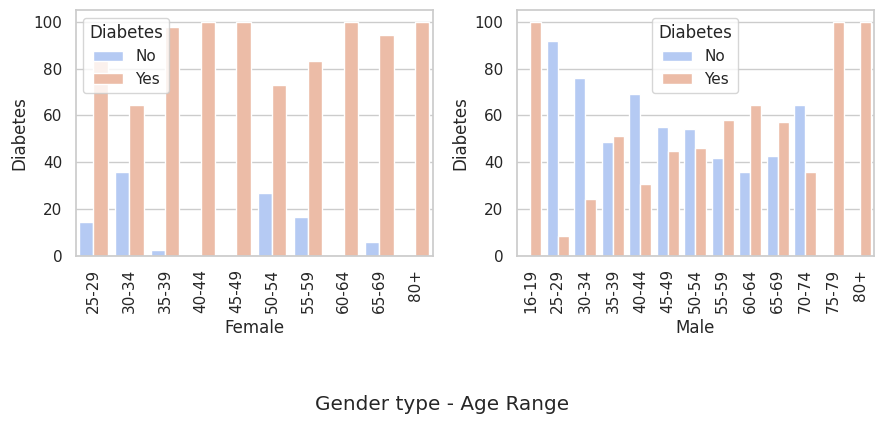

In [42]:
data['age_range'] = data['age'].apply(categorize_age)

female_percentages = calculate_percentage(data[data['gender'] == 'Female'], 'age_range', 'diabetes')
male_percentages = calculate_percentage(data[data['gender'] == 'Male'], 'age_range', 'diabetes')

plt.figure(figsize=(9, 4))

# Plot for Female

plt.subplot(1, 2, 1)
sns.barplot(x='age_range', y='percentage', hue='diabetes', data=female_percentages, palette='coolwarm', ci=None)

plt.xlabel("Female")
plt.ylabel("Diabetes")
plt.xticks(rotation=90)
plt.legend(title="Diabetes", labels=["No", "Yes"])

# Plot for Male

plt.subplot(1, 2, 2)
sns.barplot(x='age_range', y='percentage', hue='diabetes', data=male_percentages, palette='coolwarm', ci=None)

plt.xlabel("Male")
plt.ylabel("Diabetes")
plt.xticks(rotation=90)
plt.legend(title="Diabetes", labels=["No", "Yes"])

plt.suptitle("Gender type - Age Range", y=-0.1)
plt.tight_layout()
plt.show()

2. Participants’ distribution in terms of polyuria and polydipsia

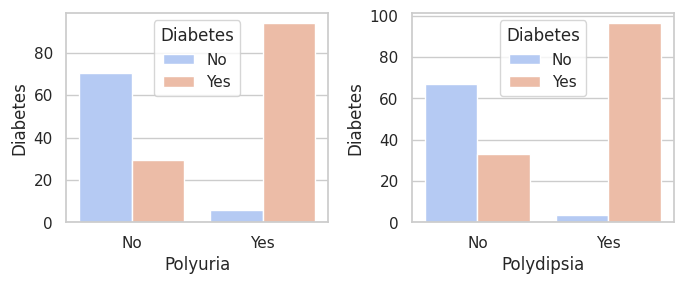

In [44]:
polyuria_percentages = calculate_percentage(data, 'polyuria', 'diabetes')
polydipsia_percentages = calculate_percentage(data, 'polydipsia', 'diabetes')

# Plot for Polyuria
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='polyuria', y='percentage', hue='diabetes', data=polyuria_percentages, palette='coolwarm', ci=None)

plt.xlabel("Polyuria")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

# Plot for Polydipsia
plt.subplot(1, 2, 2)
sns.barplot(x='polydipsia', y='percentage', hue='diabetes', data=polydipsia_percentages, palette='coolwarm', ci=None)

plt.xlabel("Polydipsia")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

3. Participants’ distribution in terms of sudden weight loss and weakness

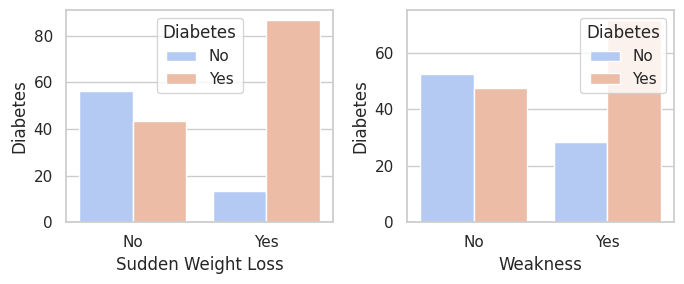

In [56]:
sudden_weight_loss_percentages = calculate_percentage(data, 'sudden_weight_loss', 'diabetes')
weakness_percentages = calculate_percentage(data, 'weakness', 'diabetes')

# Plot for Polyuria
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='sudden_weight_loss', y='percentage', hue='diabetes', data=sudden_weight_loss_percentages, palette='coolwarm', ci=None)

plt.xlabel("Sudden Weight Loss")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

# Plot for Polydipsia
plt.subplot(1, 2, 2)
sns.barplot(x='weakness', y='percentage', hue='diabetes', data=weakness_percentages, palette='coolwarm', ci=None)

plt.xlabel("Weakness")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

4. Participants’ distribution in terms of polyphagia and obesity

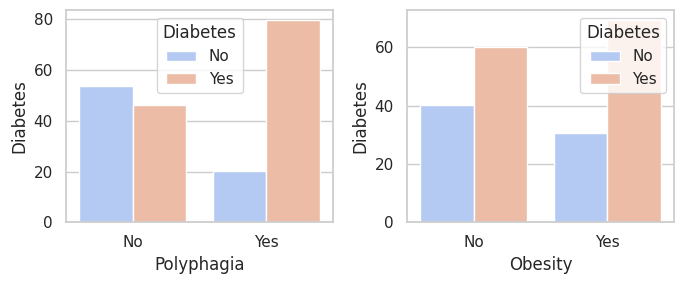

In [54]:
polyphagia_percentages = calculate_percentage(data, 'polyphagia', 'diabetes')
obesity_percentages = calculate_percentage(data, 'obesity', 'diabetes')

# Plot for Polyuria
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='polyphagia', y='percentage', hue='diabetes', data=polyphagia_percentages, palette='coolwarm', ci=None)

plt.xlabel("Polyphagia")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

# Plot for Polydipsia
plt.subplot(1, 2, 2)
sns.barplot(x='obesity', y='percentage', hue='diabetes', data=obesity_percentages, palette='coolwarm', ci=None)

plt.xlabel("Obesity")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

5. Participants’ distribution in terms of  irritability and alopecia

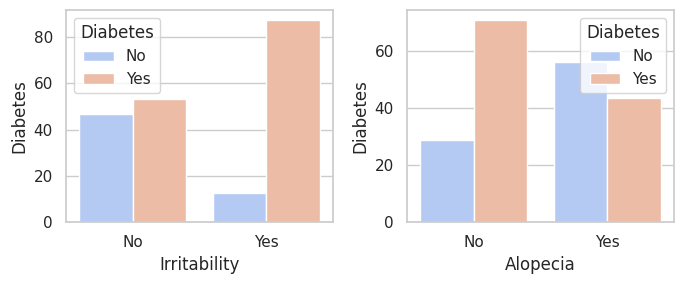

In [53]:
irritability_percentages = calculate_percentage(data, 'irritability', 'diabetes')
alopecia_percentages = calculate_percentage(data, 'alopecia', 'diabetes')

# Plot for Polyuria
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='irritability', y='percentage', hue='diabetes', data=irritability_percentages, palette='coolwarm', ci=None)

plt.xlabel("Irritability")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

# Plot for Polydipsia
plt.subplot(1, 2, 2)
sns.barplot(x='alopecia', y='percentage', hue='diabetes', data=alopecia_percentages, palette='coolwarm', ci=None)

plt.xlabel("Alopecia")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

6. Participants’ distribution in terms of thrush and itching

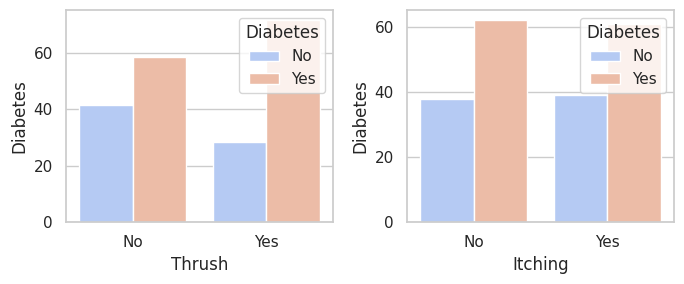

In [51]:
thrush_percentages = calculate_percentage(data, 'genital_thrush', 'diabetes')
itching_percentages = calculate_percentage(data, 'itching', 'diabetes')

# Plot for Polyuria
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='genital_thrush', y='percentage', hue='diabetes', data=thrush_percentages, palette='coolwarm', ci=None)

plt.xlabel("Thrush")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

# Plot for Polydipsia
plt.subplot(1, 2, 2)
sns.barplot(x='itching', y='percentage', hue='diabetes', data=itching_percentages, palette='coolwarm', ci=None)

plt.xlabel("Itching")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

7. Participants’ distribution in terms of partial paresis and muscle stiffness

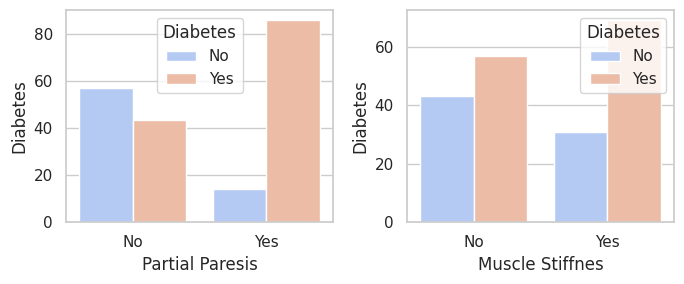

In [48]:
partial_paresis_percentages = calculate_percentage(data, 'partial_paresis', 'diabetes')
muscle_stiffness_percentages = calculate_percentage(data, 'muscle_stiffness', 'diabetes')

# Plot for Polyuria
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='partial_paresis', y='percentage', hue='diabetes', data=partial_paresis_percentages, palette='coolwarm', ci=None)

plt.xlabel("Partial Paresis")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

# Plot for Polydipsia
plt.subplot(1, 2, 2)
sns.barplot(x='muscle_stiffness', y='percentage', hue='diabetes', data=muscle_stiffness_percentages, palette='coolwarm', ci=None)

plt.xlabel("Muscle Stiffnes")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

8. Participants’ distribution in terms of delayed healing and visual blurring

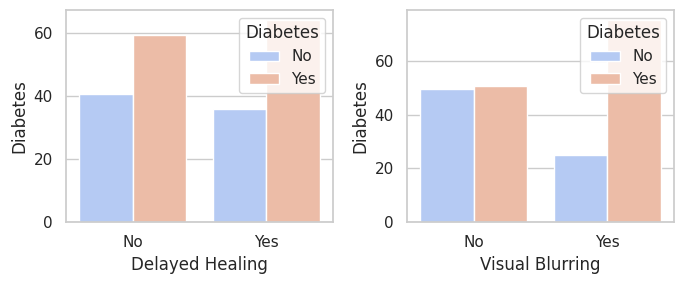

In [58]:
delayed_healing_percentages = calculate_percentage(data, 'delayed_healing', 'diabetes')
visual_blurring_percentages = calculate_percentage(data, 'visual_blurring', 'diabetes')

# Plot for Polyuria
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='delayed_healing', y='percentage', hue='diabetes', data=delayed_healing_percentages, palette='coolwarm', ci=None)

plt.xlabel("Delayed Healing")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

# Plot for Polydipsia
plt.subplot(1, 2, 2)
sns.barplot(x='visual_blurring', y='percentage', hue='diabetes', data=visual_blurring_percentages, palette='coolwarm', ci=None)

plt.xlabel("Visual Blurring")
plt.ylabel("Diabetes")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.legend(title="Diabetes", labels=["No", "Yes"])

plt.tight_layout()
plt.show()



---



# **COMPARISON**

Model comparison in terms of accuracy with 10-fold cross-validation
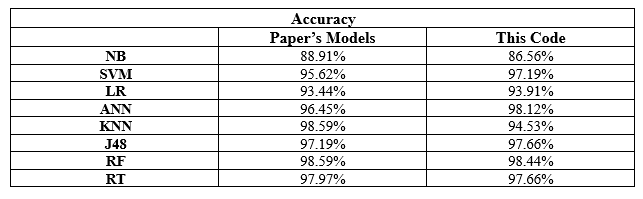

Model comparison in terms of accuracy with percentage split (80:20):

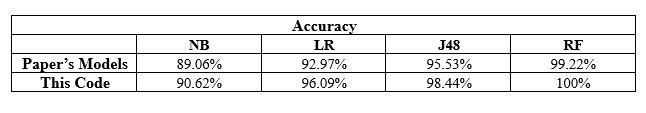


